# Client segmentation  | Cristiane Carneiro

Clustering with Hierachical Clustering

## Import libraries

In [39]:
#%pip install yellowbrick

In [40]:
# data
# ==============================================================================
import numpy as np
import pandas as pd

# charts
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

# pre-processing 
# ==============================================================================
from sklearn.preprocessing import StandardScaler

#from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering as AC
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#display
# ==============================================================================
pd.reset_option('display.max_columns')

## Import dataset

In [41]:
data_men = pd.read_csv('../data/data_clean_men.csv')

In [42]:
data_men.head()

,client_id,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,...,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,total_sum
0,124710,1,0,0,0,0,0,0,0,0,...,2,6,1,0,3,0,2,0,10,12
1,382440,1,0,0,0,0,0,0,0,0,...,0,3,1,1,0,0,0,4,1,5
2,1311915,1,0,0,0,0,0,0,0,0,...,3,6,1,2,1,7,1,3,2,13
3,1958756,0,0,0,0,0,0,0,0,0,...,1,25,14,2,13,7,20,16,12,55
4,1958794,1,0,0,0,0,0,0,0,0,...,3,8,5,2,9,9,9,6,3,27


In [43]:
data_men.columns

Index(['client_id', 'residence_country 1', 'residence_country 2',
       'residence_country 3', 'residence_country 4', 'residence_country 5',
       'residence_country 6', 'residence_country 7',
       'residence_other region 1', 'residence_other region 2',
       'residence_other region 3', 'residence_other region 4',
       'residence_other region 5', 'residence_other region 6',
       'residence_other region 7', 'residence_other region 8',
       'generation_gen silent/boomers', 'generation_gen x',
       'generation_gen z/alpha', 'generation_millennials',
       'category_children clothes', 'category_handbags',
       'category_men clothes', 'category_men shoes', 'category_other',
       'category_soft', 'category_women clothes', 'category_women shoes',
       'color_cool_jewel', 'color_neutral_pastel', 'color_other',
       'color_vivid_metallic', 'color_warm_earth', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter', 'total_sum'],
      dtype='object')

In [44]:
data_men_model = data_men.drop(columns=['client_id'],axis=1)
data_men_model.head(2)

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,...,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,total_sum
0,1,0,0,0,0,0,0,0,0,0,...,2,6,1,0,3,0,2,0,10,12
1,1,0,0,0,0,0,0,0,0,0,...,0,3,1,1,0,0,0,4,1,5


## Normalization 

In [45]:
data_men_model.columns

Index(['residence_country 1', 'residence_country 2', 'residence_country 3',
       'residence_country 4', 'residence_country 5', 'residence_country 6',
       'residence_country 7', 'residence_other region 1',
       'residence_other region 2', 'residence_other region 3',
       'residence_other region 4', 'residence_other region 5',
       'residence_other region 6', 'residence_other region 7',
       'residence_other region 8', 'generation_gen silent/boomers',
       'generation_gen x', 'generation_gen z/alpha', 'generation_millennials',
       'category_children clothes', 'category_handbags',
       'category_men clothes', 'category_men shoes', 'category_other',
       'category_soft', 'category_women clothes', 'category_women shoes',
       'color_cool_jewel', 'color_neutral_pastel', 'color_other',
       'color_vivid_metallic', 'color_warm_earth', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter', 'total_sum'],
      dtype='object')

In [46]:
columns_to_normalize = ['category_children clothes', 'category_handbags',
       'category_men clothes', 'category_men shoes', 'category_other',
       'category_soft', 'category_women clothes', 'category_women shoes',
       'color_cool_jewel', 'color_neutral_pastel', 'color_other',
       'color_vivid_metallic', 'color_warm_earth', 'season_autumn',
       'season_spring', 'season_summer', 'season_winter','total_sum']

In [47]:
subset_to_normalize = data_men_model[columns_to_normalize]

In [48]:
sc = StandardScaler()

In [49]:
normalized_data = sc.fit_transform(subset_to_normalize)

In [50]:
data_men_model[columns_to_normalize] = normalized_data

In [51]:
data_men_model.head(3)

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,...,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,total_sum
0,1,0,0,0,0,0,0,0,0,0,...,-0.138574,-0.168472,-0.765283,-0.616309,-0.384092,-0.852132,-0.489209,-0.823536,0.796206,-0.460648
1,1,0,0,0,0,0,0,0,0,0,...,-0.792741,-0.637626,-0.765283,0.079945,-0.956589,-0.852132,-0.837939,-0.134049,-0.669219,-0.886397
2,1,0,0,0,0,0,0,0,0,0,...,0.188510,-0.168472,-0.765283,0.776200,-0.765757,0.370087,-0.663574,-0.306421,-0.506394,-0.399826


In [52]:
data_men_model.drop(columns=['total_sum'],axis=1,inplace=True)

## Clustering | Hierarchical clustering 

In [53]:
#model 
hclust = AC()

#fit
hclust.fit(data_men_model)

AgglomerativeClustering()

In [54]:
# clusters
labels = hclust.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

### Clusters 

In [55]:
data_men_model['Cluster'] = labels
data_men_model.head(3)

,residence_country 1,residence_country 2,residence_country 3,residence_country 4,residence_country 5,residence_country 6,residence_country 7,residence_other region 1,residence_other region 2,residence_other region 3,...,color_cool_jewel,color_neutral_pastel,color_other,color_vivid_metallic,color_warm_earth,season_autumn,season_spring,season_summer,season_winter,Cluster
0,1,0,0,0,0,0,0,0,0,0,...,-0.138574,-0.168472,-0.765283,-0.616309,-0.384092,-0.852132,-0.489209,-0.823536,0.796206,0
1,1,0,0,0,0,0,0,0,0,0,...,-0.792741,-0.637626,-0.765283,0.079945,-0.956589,-0.852132,-0.837939,-0.134049,-0.669219,0
2,1,0,0,0,0,0,0,0,0,0,...,0.188510,-0.168472,-0.765283,0.776200,-0.765757,0.370087,-0.663574,-0.306421,-0.506394,0


### Visualization 

In [56]:
pca = PCA(2)

data_transformed = pd.DataFrame(pca.fit_transform(data_men_model), columns=["PC1","PC2"])
data_transformed.head(3)

,PC1,PC2
0,-1.225949,-0.322458
1,-2.337845,0.317021
2,-0.921026,-0.109028


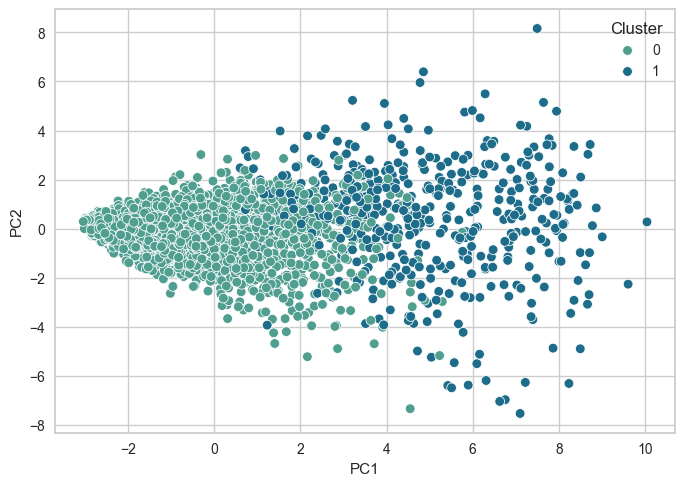

In [57]:
pca_plot = sns.scatterplot(x=data_transformed["PC1"],
                           y=data_transformed["PC2"],
                           hue=data_men_model["Cluster"],
                           palette="crest")

### Evaluation

#### Silhouette score

In [58]:
silhouette_score(data_men_model, labels)

0.4460280103373539